# Phase 1 - Data Cleaning & Preprocessing
## Step 1 - Import Libraries

We will be importing **pandas**, **numpy**, **matplotlib**, **scikit**, **nltk**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt ; plt.rcdefaults()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from pylab import rcParams
from string import ascii_lowercase
import requests
from IPython.core.display import HTML
from scipy.stats.stats import kendalltau


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


## Step 2 - Read file and make necessary changes of adding columns

In this step, we will be reading the dataset using read_csv method and will do the following: 

1. Adding a new column "profit" to display the profit of the movie
2. Extracting the necessary columns into a new dataframe "md" 
3. Joining it to another dataframe "md_genres" using "id" as the key column.

In [3]:
df = pd.read_csv("movie_dataset.csv")

In [4]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [5]:
df.shape

(4803, 24)

In [6]:
df.head()

index     budget                                    genres  \
0  0      237000000  Action Adventure Fantasy Science Fiction   
1  1      300000000  Adventure Fantasy Action                   
2  2      245000000  Action Adventure Crime                     
3  3      250000000  Action Crime Drama Thriller                
4  4      260000000  Action Adventure Science Fiction           

                                       homepage      id  \
0  http://www.avatarmovie.com/                   19995    
1  http://disney.go.com/disneypictures/pirates/  285      
2  http://www.sonypictures.com/movies/spectre/   206647   
3  http://www.thedarkknightrises.com/            49026    
4  http://movies.disney.com/john-carter          49529    

                                                                       keywords  \
0  culture clash future space war space colony society                            
1  ocean drug abuse exotic island east india trading company love of one's life   
2  spy based on novel secret agent sequel mi6                                     
3  dc comics crime fighter terrorist secret identity burglar                      
4  based on novel mars medallion space travel princess                            

  original_language                            original_title  \
0  en                Avatar                                     
1  en                Pirates of the Caribbean: At World's End   
2  en                Spectre                                    
3  en                The Dark Knight Rises                      
4  en                John Carter                                

                                                                                                                                                                                                                                                                                                                                                                                                                                       overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.                                                                                                                                                                                                                                                                
1  Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.                                                                                                                                                                                                                                                               
2  A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.                                                                                                                                                                                               
3  Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's crimes to protect the late attorney's reputation and is subsequently hunted by the Gotham City Police Department. Eight years later, Batman encounters the mysterious Selina Kyle and the villainous Bane, a new terrorist leader who overwhelms Gotham's finest. The Dark Knight resurfaces to protect a city that has branded him an enemy.   
4  John Carter is a war-weary, former military captain who's inexplicably transported to the mysterious and exotic planet of Barsoom (Mars) and reluctantly becomes embroiled in an epic conflic

In [7]:
md = df[['index','id','revenue', 'title', 'genres','keywords','cast','director','popularity','budget','vote_count','vote_average','release_date']]

In [8]:
md.head()

,index,id,revenue,title,genres,keywords,cast,director,popularity,budget,vote_count,vote_average,release_date
0,0,19995,2787965087,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony society,Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez,James Cameron,150.437577,237000000,11800,7.2,2009-12-10
1,1,285,961000000,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trading company love of one's life,Johnny Depp Orlando Bloom Keira Knightley Stellan Skarsg\u00e5rd Chow Yun-fat,Gore Verbinski,139.082615,300000000,4500,6.9,2007-05-19
2,2,206647,880674609,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux Ralph Fiennes Monica Bellucci,Sam Mendes,107.376788,245000000,4466,6.3,2015-10-26
3,3,49026,1084939099,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret identity burglar,Christian Bale Michael Caine Gary Oldman Anne Hathaway Tom Hardy,Christopher Nolan,112.312950,250000000,9106,7.6,2012-07-16
4,4,49529,284139100,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel princess,Taylor Kitsch Lynn Collins Samantha Morton Willem Dafoe Thomas Haden Church,Andrew Stanton,43.926995,260000000,2124,6.1,2012-03-07


In [9]:
s = md['id']
del md['id']
md_genres = md.join(s)

In [10]:
md_genres.head()

,index,revenue,title,genres,keywords,cast,director,popularity,budget,vote_count,vote_average,release_date,id
0,0,2787965087,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony society,Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez,James Cameron,150.437577,237000000,11800,7.2,2009-12-10,19995
1,1,961000000,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trading company love of one's life,Johnny Depp Orlando Bloom Keira Knightley Stellan Skarsg\u00e5rd Chow Yun-fat,Gore Verbinski,139.082615,300000000,4500,6.9,2007-05-19,285
2,2,880674609,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux Ralph Fiennes Monica Bellucci,Sam Mendes,107.376788,245000000,4466,6.3,2015-10-26,206647
3,3,1084939099,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret identity burglar,Christian Bale Michael Caine Gary Oldman Anne Hathaway Tom Hardy,Christopher Nolan,112.312950,250000000,9106,7.6,2012-07-16,49026
4,4,284139100,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel princess,Taylor Kitsch Lynn Collins Samantha Morton Willem Dafoe Thomas Haden Church,Andrew Stanton,43.926995,260000000,2124,6.1,2012-03-07,49529


## Step 3 - Select Features

In this step, we will extract the necessary features for a content based recommender system and do the following: 

1. Fill all the NaN values in it using fillna() method
2. Change all the features into lowercase
3. Remove the space between the director to make it one string.


In [11]:
md_genres.isna().sum()

index           0  
revenue         0  
title           0  
genres          28 
keywords        412
cast            43 
director        30 
popularity      0  
budget          0  
vote_count      0  
vote_average    0  
release_date    1  
id              0  
dtype: int64

In [12]:
features = ['genres', 'director', 'cast', 'keywords']
for feature in features:
    md_genres[feature] = md_genres[feature].fillna('')
    md_genres[feature] = md_genres[feature].astype(str).apply(lambda x: str.lower(x))

In [13]:
md_genres['release_date'] = md_genres['release_date'].fillna('0')
md_genres['director'] = md_genres['director'].astype('str').apply(lambda x: x.replace(" ", ""))

## Step 4 - Create a column in DF which combines all selected features

In this step, we will combine all the extracted features into a single column called "soup" and will perform the following:

1. Tokenization
2. Lemmatization
3. Stop Word Removal
4. Combining the preprocessed columns into a single column 
4. Deleting the unwanted newly created columns

In [14]:
def combine_features(row):
    return str(row['genres'])+" "+ str(row['director'])+" "+ str(row['cast'])+" "+ str(row['keywords'])
md_genres["soup"] = md_genres.apply(combine_features, axis = 1)

In [15]:
md_genres.head(10)

,index,revenue,title,genres,keywords,cast,director,popularity,budget,vote_count,vote_average,release_date,id,soup
0,0,2787965087,Avatar,action adventure fantasy science fiction,culture clash future space war space colony society,sam worthington zoe saldana sigourney weaver stephen lang michelle rodriguez,jamescameron,150.437577,237000000,11800,7.2,2009-12-10,19995,action adventure fantasy science fiction jamescameron sam worthington zoe saldana sigourney weaver stephen lang michelle rodriguez culture clash future space war space colony society
1,1,961000000,Pirates of the Caribbean: At World's End,adventure fantasy action,ocean drug abuse exotic island east india trading company love of one's life,johnny depp orlando bloom keira knightley stellan skarsg\u00e5rd chow yun-fat,goreverbinski,139.082615,300000000,4500,6.9,2007-05-19,285,adventure fantasy action goreverbinski johnny depp orlando bloom keira knightley stellan skarsg\u00e5rd chow yun-fat ocean drug abuse exotic island east india trading company love of one's life
2,2,880674609,Spectre,action adventure crime,spy based on novel secret agent sequel mi6,daniel craig christoph waltz l\u00e9a seydoux ralph fiennes monica bellucci,sammendes,107.376788,245000000,4466,6.3,2015-10-26,206647,action adventure crime sammendes daniel craig christoph waltz l\u00e9a seydoux ralph fiennes monica bellucci spy based on novel secret agent sequel mi6
3,3,1084939099,The Dark Knight Rises,action crime drama thriller,dc comics crime fighter terrorist secret identity burglar,christian bale michael caine gary oldman anne hathaway tom hardy,christophernolan,112.312950,250000000,9106,7.6,2012-07-16,49026,action crime drama thriller christophernolan christian bale michael caine gary oldman anne hathaway tom hardy dc comics crime fighter terrorist secret identity burglar
4,4,284139100,John Carter,action adventure science fiction,based on novel mars medallion space travel princess,taylor kitsch lynn collins samantha morton willem dafoe thomas haden church,andrewstanton,43.926995,260000000,2124,6.1,2012-03-07,49529,action adventure science fiction andrewstanton taylor kitsch lynn collins samantha morton willem dafoe thomas haden church based on novel mars medallion space travel princess
5,5,890871626,Spider-Man 3,fantasy action adventure,dual identity amnesia sandstorm love of one's life forgiveness,tobey maguire kirsten dunst james franco thomas haden church topher grace,samraimi,115.699814,258000000,3576,5.9,2007-05-01,559,fantasy action adventure samraimi tobey maguire kirsten dunst james franco thomas haden church topher grace dual identity amnesia sandstorm love of one's life forgiveness
6,6,591794936,Tangled,animation family,hostage magic horse fairy tale musical,zachary levi mandy moore donna murphy ron perlman m.c. gainey,byronhoward,48.681969,260000000,3330,7.4,2010-11-24,38757,animation family byronhoward zachary levi mandy moore donna murphy ron perlman m.c. gainey hostage magic horse fairy tale musical
7,7,1405403694,Avengers: Age of Ultron,action adventure science fiction,marvel comic sequel superhero based on comic book vision,robert downey jr. chris hemsworth mark ruffalo chris evans scarlett johansson,josswhedon,134.279229,280000000,6767,7.3,2015-04-22,99861,action adventure science fiction josswhedon robert downey jr. chris hemsworth mark ruffalo chris evans scarlett johansson marvel comic sequel superhero based on comic book vision
8,8,933959197,Harry Potter and the Half-Blood Prince,adventure fantasy family,witch magic broom school of witchcraft wizardry,daniel radcliffe rupert grint emma watson tom felton michael gambon,davidyates,98.885637,250000000,5293,7.4,2009-07-07,767,adventure fantasy family davidyates daniel radcliffe rupert grint emma watson tom felton michael gambon witch magic broom school of witchcraft wizardry
9,9,873260194,Batman v Superman: Dawn of Justice,action adventure fantasy,dc comics vigilante superhero based on comic book revenge,ben affleck henry cavill ga

1. Tokenization

What it does? It changes strings to tokens. 
Example:

1. String: **Tokenization is used to convert strings to tokens.**
2. Tokens: **[Tokenization, is, used, to convert, strings, to, tokens]**

In [16]:
def identify_tokens(row):
    my_list = row['soup']
    tokens = word_tokenize(my_list)
    token_words = [w for w in tokens if w.isalnum()]
    return token_words


In [17]:
md_genres['tokens'] = md_genres.apply(identify_tokens, axis = 1)

2. Lemmatization

What it does? It checks the available tokens against a lemmatizer and converts the tokens to meaningful form.
Example:
1. Tokens: **[words, available, wording, availablity]**
2. Lemmatized words: **[word, available, word, available]**

In [18]:
def lemma_row(row):
    lemmatizer = WordNetLemmatizer()
    my_list =row['tokens']
    lemma_list = [lemmatizer.lemmatize(words) for words in my_list]
    return lemma_list


In [19]:
md_genres['lemma_words'] = md_genres.apply(lemma_row, axis = 1)

3. Stop Word Removal

What it does? It removes the stop words from the list of tokens.
Example:
1. Tokens: **[Token, is, use, to convert, string, to, token]**
2. List after stop word removal: **[Token, use, convert, string, token]**

In [20]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english")) 

#print(stops)
def remove_stops(row):
    my_list = row['lemma_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)


In [21]:
md_genres['stem_words'] = md_genres.apply(remove_stops, axis=1)

4. Combining the preprocessed columns into a single column

In this step,we will be joining all the columns into a single existing column "soup"

In [22]:
def combine_words(row):
    my_list = row['stem_words']
    joined_words = ( " ".join(my_list))
    return joined_words



In [23]:
md_genres['soup'] = md_genres.apply(combine_words, axis=1)
md_genres.head(10)

,index,revenue,title,genres,keywords,cast,director,popularity,budget,vote_count,vote_average,release_date,id,soup,tokens,lemma_words,stem_words
0,0,2787965087,Avatar,action adventure fantasy science fiction,culture clash future space war space colony society,sam worthington zoe saldana sigourney weaver stephen lang michelle rodriguez,jamescameron,150.437577,237000000,11800,7.2,2009-12-10,19995,action adventure fantasy science fiction jamescameron sam worthington zoe saldana sigourney weaver stephen lang michelle rodriguez culture clash future space war space colony society,"[action, adventure, fantasy, science, fiction, jamescameron, sam, worthington, zoe, saldana, sigourney, weaver, stephen, lang, michelle, rodriguez, culture, clash, future, space, war, space, colony, society]","[action, adventure, fantasy, science, fiction, jamescameron, sam, worthington, zoe, saldana, sigourney, weaver, stephen, lang, michelle, rodriguez, culture, clash, future, space, war, space, colony, society]","[action, adventure, fantasy, science, fiction, jamescameron, sam, worthington, zoe, saldana, sigourney, weaver, stephen, lang, michelle, rodriguez, culture, clash, future, space, war, space, colony, society]"
1,1,961000000,Pirates of the Caribbean: At World's End,adventure fantasy action,ocean drug abuse exotic island east india trading company love of one's life,johnny depp orlando bloom keira knightley stellan skarsg\u00e5rd chow yun-fat,goreverbinski,139.082615,300000000,4500,6.9,2007-05-19,285,adventure fantasy action goreverbinski johnny depp orlando bloom keira knightley stellan chow ocean drug abuse exotic island east india trading company love one life,"[adventure, fantasy, action, goreverbinski, johnny, depp, orlando, bloom, keira, knightley, stellan, chow, ocean, drug, abuse, exotic, island, east, india, trading, company, love, of, one, life]","[adventure, fantasy, action, goreverbinski, johnny, depp, orlando, bloom, keira, knightley, stellan, chow, ocean, drug, abuse, exotic, island, east, india, trading, company, love, of, one, life]","[adventure, fantasy, action, goreverbinski, johnny, depp, orlando, bloom, keira, knightley, stellan, chow, ocean, drug, abuse, exotic, island, east, india, trading, company, love, one, life]"
2,2,880674609,Spectre,action adventure crime,spy based on novel secret agent sequel mi6,daniel craig christoph waltz l\u00e9a seydoux ralph fiennes monica bellucci,sammendes,107.376788,245000000,4466,6.3,2015-10-26,206647,action adventure crime sammendes daniel craig christoph waltz seydoux ralph fiennes monica bellucci spy based novel secret agent sequel mi6,"[action, adventure, crime, sammendes, daniel, craig, christoph, waltz, seydoux, ralph, fiennes, monica, bellucci, spy, based, on, novel, secret, agent, sequel, mi6]","[action, adventure, crime, sammendes, daniel, craig, christoph, waltz, seydoux, ralph, fiennes, monica, bellucci, spy, based, on, novel, secret, agent, sequel, mi6]","[action, adventure, crime, sammendes, daniel, craig, christoph, waltz, seydoux, ralph, fiennes, monica, bellucci, spy, based, novel, secret, agent, sequel, mi6]"
3,3,1084939099,The Dark Knight Rises,action crime drama thriller,dc comics crime fighter terrorist secret identity burglar,christian bale michael caine gary oldman anne hathaway tom hardy,christophernolan,112.312950,250000000,9106,7.6,2012-07-16,49026,action crime drama thriller christophernolan christian bale michael caine gary oldman anne hathaway tom hardy dc comic crime fighter terrorist secret identity burglar,"[action, crime, drama, thriller, christophernolan, christian, bale, michael, caine, gary, oldman, anne, hathaway, tom, hardy, dc, comics, crime, fighter, terrorist, secret, identity, burglar]","[action, crime, drama, thriller, christophernolan, christian, bale, michael, caine, gary, oldman, anne, hathaway, tom, hardy, dc, comic, crime, fighter, terrorist, secret, identity, burglar]","[action, crime, drama, thriller, christophernolan, christian, bale, michael, 

5. Deleting the unwanted newly created columns 

In [24]:
cols_to_drop = ['tokens', 'lemma_words', 'stem_words']
md_genres.drop(cols_to_drop, axis=1,  inplace=True)

## Step 5 - Create count matrix from this new combined column

In this step, we will be coverting the soup column into an array matrix, which counts the frequency of tokens in each row.

In [25]:
vectorizer = CountVectorizer()
soup_matrix = vectorizer.fit_transform(md_genres["soup"])

# Phase 2 - Data Modeling
## Step 6 - Compute the Cosine Similarity based on the count matrix

Here, we are going to apply cosine similarity to rank the similar movies using the angular distance between each movies based on the extracted features.

In [26]:
cosine_sim = cosine_similarity(soup_matrix)

## Step 7 - Get the input movie title and enumerate a list in the descending order of cosine values.

In this step, we will use 4 user defined functions:
1. **get_index_from_title(title)** - This function is used to extract the index of the movie title passed. 
2. **weighted_rating(x)** - This function is used to apply the weighted score method to rank the movies.
3. **recommender_get(title)** - This function is used to enumerate a list, sorted in the descending order of the cosine values and display our data in a dataframe "trained" with the addition of three new columns - cosine_values, weighted_rating, rank.

In [27]:
def get_index_from_title(title):
    return md_genres[md_genres.title == title]["index"].values[0]

In [28]:
md_genres['year'] = pd.to_datetime(md_genres['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
def weighted_rating(x):
    vote_counts = md_genres[md_genres['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = md_genres[md_genres['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.50)
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(v+m) * C)

In [29]:
def recommender_get(title):
    movie_index = get_index_from_title(title)
    similar_movies = list(enumerate(cosine_sim[movie_index]))   
    sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse = True)[1:51]
    movie_indices = [i[0] for i in sorted_similar_movies]
    trained = md_genres.iloc[movie_indices][['title', 'genres', 'year', 'vote_count', 'vote_average']]
    
    movie_values = [i[1] for i in sorted_similar_movies]
    trained['cosine_values'] = pd.Series(movie_values).values
    trained['weighted_rating'] = trained.apply(weighted_rating, axis=1)
    trained["rank"] = trained[["cosine_values"]].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(int)
    trained.sort_values('rank', ascending = True)
    return trained

In [30]:
def movies(trained):
    movies_df = trained[['title', 'year', 'genres', 'rank']]
    return movies_df.head(10)

# Phase 3 - Data Visualization
## Step 8 - Plot the movie recommendation.

Generating the recommendations with inline images by converting links to html tags.  

In [31]:
#Type in the movie name -- Case Sensitive
movie_name = input()
trained_df = recommender_get(movie_name)
movies_df = movies(trained_df)


Shrek


In [32]:
%%time
api_key= 'e794fb07'
base_url= 'http://www.omdbapi.com/?apikey='+api_key
index_poster_urls=[]

for index, row in movies_df.iterrows(): 
    flag=0
    print("Checking for ",row['title'])
    final_url= base_url+'&s='+row['title']+'&plot=full'
    request= requests.get(final_url)
    data=request.json()
#     print(data)

    if 'Error' in data:
        print("Invalid movie name")
        index_poster_urls.append("Display picture not available")
    else:
        if(row['year']==''):
            print(data['Search'][0]['Poster'])
            index_poster_urls.append(data['Search'][0]['Poster'])
            flag=1   
        else:
            for dict_movie in data['Search']:
                if(dict_movie['Year'] == row['year'] or dict_movie['Title'].lower()==row['title'].lower()):
                    print(dict_movie['Poster'])
                    index_poster_urls.append(dict_movie['Poster'])
                    flag=1
                    break
        if(flag==0):
            print(data)


Checking for  Shrek 2
https://m.media-amazon.com/images/M/MV5BMDJhMGRjN2QtNDUxYy00NGM3LThjNGQtMmZiZTRhNjM4YzUxL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Checking for  Shrek Forever After
https://m.media-amazon.com/images/M/MV5BMTY0OTU1NzkxMl5BMl5BanBnXkFtZTcwMzI2NDUzMw@@._V1_SX300.jpg
Checking for  Shrek the Third
https://m.media-amazon.com/images/M/MV5BOTgyMjc3ODk2MV5BMl5BanBnXkFtZTcwMjY0MjEzMw@@._V1_SX300.jpg
Checking for  Aladdin
https://m.media-amazon.com/images/M/MV5BY2Q2NDI1MjUtM2Q5ZS00MTFlLWJiYWEtNTZmNjQ3OGJkZDgxXkEyXkFqcGdeQXVyNTI4MjkwNjA@._V1_SX300.jpg
Checking for  Rugrats in Paris: The Movie
https://m.media-amazon.com/images/M/MV5BM2E0ZjhkM2YtZjNjMy00YjhiLWJlZDEtNDEwZThkM2VmMDU5L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Checking for  Thunder and the House of Magic
https://m.media-amazon.com/images/M/MV5BMTEzOTk1NjYyNjVeQTJeQWpwZ15BbWU4MDg5ODI2NTIx._V1_SX300.jpg
Checking for  The Smurfs
https://m.media-amazon.com/images/M/MV5BNDUyMmFiYTctZDcyYS

In [33]:
movies_df2 = movies_df.copy()

In [34]:
movies_df2.insert (0, "image", index_poster_urls)

# convert your links to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '"length="100" width="75" >'

pd.set_option('display.max_colwidth', 5)

df2= HTML(movies_df2.to_html(escape=False ,formatters=dict(image=path_to_image_html)))
display(df2)



,image,title,year,genres,rank
565,,Shrek 2,2004,adventure animation comedy family fantasy,1
86,,Shrek Forever After,2010,comedy adventure fantasy animation family,2
106,,Shrek the Third,2007,fantasy adventure animation comedy family,3
1695,,Aladdin,1992,animation family comedy adventure fantasy,4
1562,,Rugrats in Paris: The Movie,2000,adventure animation comedy family,5
1481,,Thunder and the House of Magic,2013,family fantasy animation adventure,6
254,,The Smurfs,2011,animation family adventure comedy fantasy,7
364,,The Haunted Mansion,2003,thriller fantasy comedy family mystery,8
289,,The Emperor's New Groove,2000,adventure animation comedy family fantasy,9
413,,Nutty Professor II: The Klumps,2000,fantasy comedy romance science fiction,9


#### Heat map to visualize the correlation between variables.

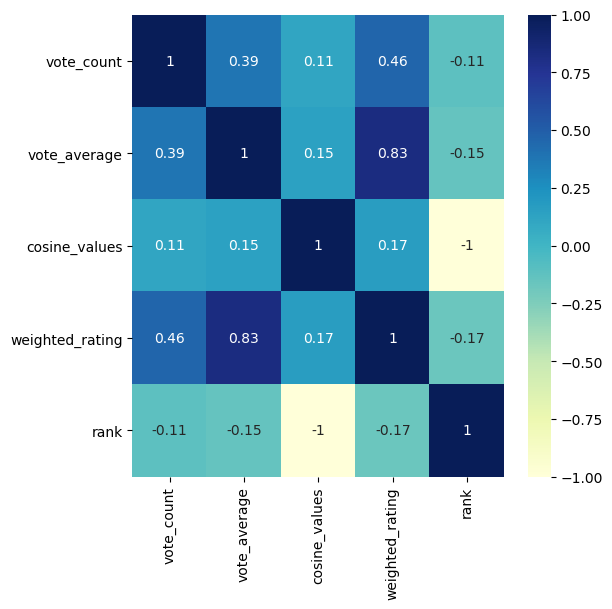

In [35]:
#Visualize using22 heatmap

corr = trained_df.corr(method='kendall')
rcParams['figure.figsize'] = 6,6
sb.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)